# **INTRODUCTION**

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 78.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


### Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import plotly.graph_objects as go

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [4]:
df_data = pd.read_csv('mission_launch_new.csv', index_col=0, parse_dates=['Date'])

# **PRELIMINARY DATA EXPLORATION**

## **Data overview**

### ***Shape of data and data information.***



In [ ]:
#Shape of data
print(f'Data have {df_data.shape[0]} rows and {df_data.shape[1]} columns')
#Column name and info and type
display(df_data.info())

Data have 6605 rows and 7 columns
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6605 entries, 1 to 6605
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    6605 non-null   object
 1   Location        6605 non-null   object
 2   Date            6605 non-null   object
 3   Detail          6605 non-null   object
 4   Rocket_status   6605 non-null   object
 5   Price           6605 non-null   object
 6   Mission_status  6605 non-null   object
dtypes: object(7)
memory usage: 412.8+ KB


None

### ***Top 5 rows and Bottom 5 rows***

In [ ]:
#First 5 top rows
display(df_data.head())
#bottom 5 rows
display(df_data.tail())

,Organisation,Location,Date,Detail,Rocket_status,Price,Mission_status
1,ULA,"SLC-41, Cape Canaveral SFS, Florida, USA",2023-09-10 12:47:00+00:00,Atlas V 551 | SILENTBARKER (NROL-107),Active,153,Success
2,CASC,"LC-9A, Taiyuan Satellite Launch Center, China",2023-09-10 04:30:00+00:00,Long March 6A | Yaogan 40,Active,na,Success
3,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",2023-09-09 03:12:00+00:00,Falcon 9 Block 5 | Starlink Group 6-14,Active,67,Success
4,Virgin Galactic,"VMS Eve, Spaceport America, New Mexico, USA",2023-09-08 15:22:00+00:00,SpaceShipTwo | Galactic-03,Active,na,Success
5,MHI,"LA-Y1, Tanegashima Space Center, Japan",2023-09-06 23:42:00+00:00,H-IIA 202 | SLIM & XRISM,Active,90,Success


,Organisation,Location,Date,Detail,Rocket_status,Price,Mission_status
6601,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,Retired,na,Failure
6602,ABMA,"LC-26A, Cape Canaveral SFS, Florida, USA",1958-02-01 03:47:00+00:00,Juno I | Explorer 1,Retired,na,Success
6603,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,Retired,na,Failure
6604,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik 2,Retired,na,Success
6605,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik 1,Retired,na,Success


## **Data Cleaning - Check for Missing Values and Duplicates**


### ***Check for duplicated values***

---



In [ ]:
#Check for duplication
print(f"Is there any duplicated value? {df_data.duplicated().values.any()} ")
#Check all duplicated value
duplicated_data = df_data[df_data.duplicated(keep=False)]
duplicated_data


Is there any duplicated value? False 


,Organisation,Location,Date,Detail,Rocket_status,Price,Mission_status


### ***Check for NaN***

---



In [ ]:
#check for NaN
print(f"Is there any NaN value? {df_data.isna().values.any()}")

Is there any NaN value? False


There no NaN value in dataframe. However, when we scraped data from website, a lot of projects have no price info which we filled it with "na" value. We will transform this "na" values to 0 for easy analyzing and exploration.

In [5]:
#transform "na" in "Price" columns
df_data['Price'].replace('na',0,inplace=True)

## **Convert data to useful type**



### ***Convert Date column to Datetime***

---



In [6]:
#Remove time in Date column
df_data.Date=df_data.Date.astype('str').str.split(' ',n=1,expand=True)[0]
#Convert Date column to datetime
df_data.Date=pd.to_datetime(df_data.Date)
#Recheck date column info
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6605 entries, 1 to 6605
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    6605 non-null   object        
 1   Location        6605 non-null   object        
 2   Date            6605 non-null   datetime64[ns]
 3   Detail          6605 non-null   object        
 4   Rocket_status   6605 non-null   object        
 5   Price           6605 non-null   object        
 6   Mission_status  6605 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 412.8+ KB


### ***Convert Price column to float***

---




In [7]:
#Convert price column to float
df_data['Price']=df_data['Price'].astype(str).str.replace(',','')
df_data['Price']=pd.to_numeric(df_data['Price'])

### ***Convert Rocket_Status column values to 0 and 1 for easy analyzing.***

---



In [8]:
#Convert Rocket_Status to 0: StatusRetired and 1: StatusActive
df_data.Rocket_status = df_data.Rocket_status.map({'Retired':0,'Active':1})
df_data.head()

,Organisation,Location,Date,Detail,Rocket_status,Price,Mission_status
1,ULA,"SLC-41, Cape Canaveral SFS, Florida, USA",2023-09-10,Atlas V 551 | SILENTBARKER (NROL-107),1,153.00,Success
2,CASC,"LC-9A, Taiyuan Satellite Launch Center, China",2023-09-10,Long March 6A | Yaogan 40,1,0.00,Success
3,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",2023-09-09,Falcon 9 Block 5 | Starlink Group 6-14,1,67.00,Success
4,Virgin Galactic,"VMS Eve, Spaceport America, New Mexico, USA",2023-09-08,SpaceShipTwo | Galactic-03,1,0.00,Success
5,MHI,"LA-Y1, Tanegashima Space Center, Japan",2023-09-06,H-IIA 202 | SLIM & XRISM,1,90.00,Success


In [9]:
#Double check the data type
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6605 entries, 1 to 6605
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    6605 non-null   object        
 1   Location        6605 non-null   object        
 2   Date            6605 non-null   datetime64[ns]
 3   Detail          6605 non-null   object        
 4   Rocket_status   6605 non-null   int64         
 5   Price           6605 non-null   float64       
 6   Mission_status  6605 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 412.8+ KB


## **Add Country and Country code columns**

###  ***Add country column***

---



In [10]:
#Add "Country" column
df_data['Country']=df_data['Location'].str.rsplit(',',n=1,expand=True)[1].str.strip()
df_data

,Organisation,Location,Date,Detail,Rocket_status,Price,Mission_status,Country
1,ULA,"SLC-41, Cape Canaveral SFS, Florida, USA",2023-09-10,Atlas V 551 | SILENTBARKER (NROL-107),1,153.00,Success,USA
2,CASC,"LC-9A, Taiyuan Satellite Launch Center, China",2023-09-10,Long March 6A | Yaogan 40,1,0.00,Success,China
3,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",2023-09-09,Falcon 9 Block 5 | Starlink Group 6-14,1,67.00,Success,USA
4,Virgin Galactic,"VMS Eve, Spaceport America, New Mexico, USA",2023-09-08,SpaceShipTwo | Galactic-03,1,0.00,Success,USA
5,MHI,"LA-Y1, Tanegashima Space Center, Japan",2023-09-06,H-IIA 202 | SLIM & XRISM,1,90.00,Success,Japan
...,...,...,...,...,...,...,...,...
6601,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",1958-02-05,Vanguard | Vanguard TV3BU,0,0.00,Failure,USA
6602,ABMA,"LC-26A, Cape Canaveral SFS, Florida, USA",1958-02-01,Juno I | Explorer 1,0,0.00,Success,USA
6603,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",1957-12-06,Vanguard | Vanguard TV3,0,0.00,Failure,USA
6604,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,Sputnik 8K71PS | Sputnik 2,0,0.00,Success,Kazakhstan


### ***Add Country code column***

---



* *Overview and change countries name to match ISO*

---






In [11]:
#Overview all countries in dataset
df_data['Country'].value_counts()

USA                               2000
Russia                            1808
Kazakhstan                        1550
China                              545
France                             323
Japan                              131
India                               91
New Zealand                         37
Pacific Ocean                       36
Iran                                17
Israel                              14
Marshall Islands                     9
Kenya                                9
North Korea                          7
South Korea                          6
Yellow Sea                           6
Australia                            6
Barents Sea                          3
Brazil                               3
Gran Canaria                         2
United Kingdom                       1
Pacific Missile Range Facility       1
Name: Country, dtype: int64

In [12]:
#Change 'Russia' & 'Barents Sea' to 'Russian Federation'
df_data['Country'] = df_data['Country'].str.replace('Russia|Barents Sea', 'Russian Federation')

#Change 'Pacific Ocean' & 'Marshall Islands' & 'Pacific Missile Range Facility' & 'Gran Canaria' to 'USA'
df_data['Country'] = df_data['Country'].str.replace('Pacific Ocean|Marshall Islands|Pacific Missile Range Facility|Gran Canaria',
                                                    'USA')

#Change 'Yellow Sea' to 'China'
df_data['Country'] = df_data['Country'].str.replace('Yellow Sea', 'China')

#Change 'South Korea' country to 'Korea, Republic of'
df_data['Country']=df_data['Country'].str.replace('South Korea','Korea, Republic of')

#Change 'North Korea' country to 'Korea, Democratic People's Republic of'
df_data['Country']=df_data['Country'].str.replace('North Korea',"Korea, Democratic People's Republic of")

#Change 'Iran' country to 'Iran, Islamic Republic of'
df_data['Country']=df_data['Country'].str.replace('Iran',"Iran, Islamic Republic of")

#Change 'United Kingdom' to 'United Kingdom of Great Britain and Northern Ireland'
df_data['Country']=df_data['Country'].str.replace('United Kingdom',"United Kingdom of Great Britain and Northern Ireland")

<ipython-input-12-83db7a154936>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_data['Country'] = df_data['Country'].str.replace('Russia|Barents Sea', 'Russian Federation')
<ipython-input-12-83db7a154936>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_data['Country'] = df_data['Country'].str.replace('Pacific Ocean|Marshall Islands|Pacific Missile Range Facility|Gran Canaria',


* *Base on country name and ISO, create country code column.*

---





In [13]:
#convert to country code and save in list.
#Some projects were launched in neutral area so I would put these ones to Other as country code
country_code=[]
for c in df_data.Country:
  try:
    cc = countries.get(c).alpha3
  except:
    cc='Other'
  finally:
    country_code.append(cc)

In [14]:
#create new column called "Country_code" in data
df_data['Country_code'] = country_code

### ***Add year and month column***

In [15]:
#Create datetime index
dt_index = pd.DatetimeIndex(df_data['Date'])
years_dt = dt_index.year
month_dt = dt_index.month
#Add year column to sub-dataframe
df_data['Year'] = years_dt
df_data['Month'] = month_dt

## **Descriptive Statistics**

* *Check time range of dataset*

---




In [16]:
#Check time range of dataset
display(df_data['Date'].min())
display(df_data['Date'].max())

Timestamp('1957-10-04 00:00:00')

Timestamp('2023-09-10 00:00:00')

Data was collected from 04 October 1957 to 10 September 2023.

* *View how many number of Organisations in this dataset.*

---



In [17]:
#Number of Organisation in the dataset
print(f"There are {df_data['Organisation'].nunique()} organisation in dataset")

There are 64 organisation in dataset


There are 64 organisations included in this dataset

* *Understand some information from dataset.*

---



In [18]:
#descibe of data
df_data.describe()

,Rocket_status,Price,Year,Month
count,"6,605.00","6,605.00","6,605.00","6,605.00"
mean,0.21,30.21,"1,990.47",6.81
std,0.41,102.18,19.02,3.39
min,0.00,0.00,"1,957.00",1.00
25%,0.00,0.00,"1,974.00",4.00
50%,0.00,0.00,"1,988.00",7.00
75%,0.00,20.00,"2,008.00",10.00
max,1.00,"3,000.00","2,023.00",12.00


From table above, we can see some basice information from dataset:
* The maximum price of one project is 3 billion dollar
* Average price per project is around 30.21 million dollar - That's not totally correct cause there're lots of projects that have no price information.
* Almost 21% of Rockets is still active

# **DATA VISUALISATION**

## **General Data visualisation**

### ***Price and Number of Porjects***

#### *Price: Cost Per Project (Histogram)*

Using <b>Plotly Pie Chart</b> to show how many rockets are active compared to those that are decomissioned?

In [19]:
#Create new dataframe withhout 0 value in Price column
price_df = df_data[df_data['Price'] != 0]

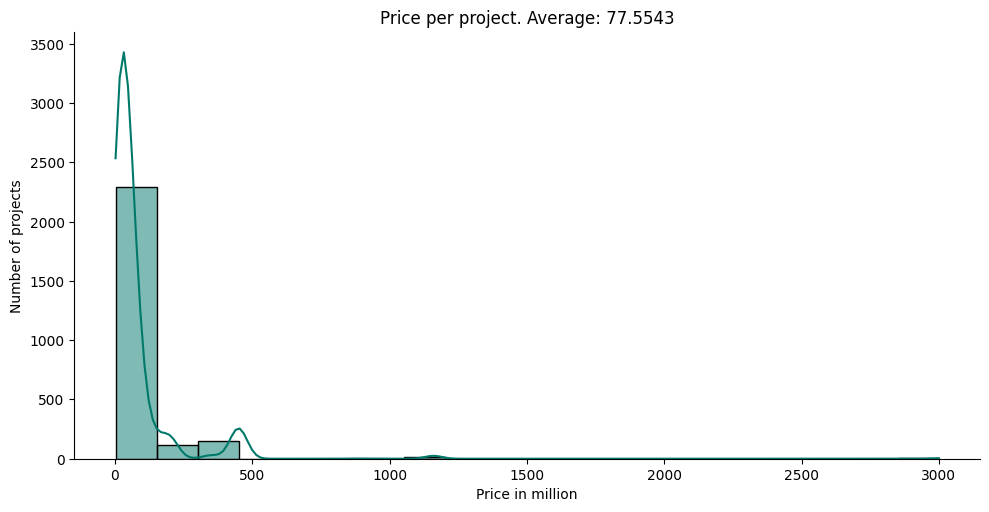

In [20]:
#Histogram to visualise the Price per project distribution
sns.displot(price_df['Price'],
            bins=20,
            aspect=2,
            kde=True,
            color='#00796b')

plt.title(f'Price per project. Average: {(price_df.Price.mean()):.6}')
plt.xlabel('Price in million')
plt.ylabel('Number of projects')

plt.show()

As the chart shows above, average price per project is <b>$77.55 million</b>.
Most projects costed around <b>60</b> to <b>80 million</b> and very few projects exceed <b>100 million</b> dollar.

#### *Reflection of* **Price** *and* **Number of Projects** *and their* **5-years moving average** *(Scatterplot & Line)*

Combine **Scatterplot & Line Chart** to visualize number of projects and price fluctuation per year and their 5 year moving average.

* *Create yearly launch number series and rolling series accordingly*

---

In [21]:
#Create number of projects per year Series
yearly_launch = df_data['Year'].value_counts()
yearly_launch.sort_index(inplace=True)
#create rolling Series
roll_yearly_launch = yearly_launch.rolling(window=5).mean()

* *Create average price per year per project dataframe and rolling dataframe accordingly*

---

In [22]:
#Create price per year dataframe
yearly_avgmoney = price_df.groupby('Year',
                               as_index=False).agg({'Price':pd.Series.mean})
#Create roling dataframe
roll_yearly_avgmoney = yearly_avgmoney.rolling(window=5).mean()

* *Data visualisation*

---

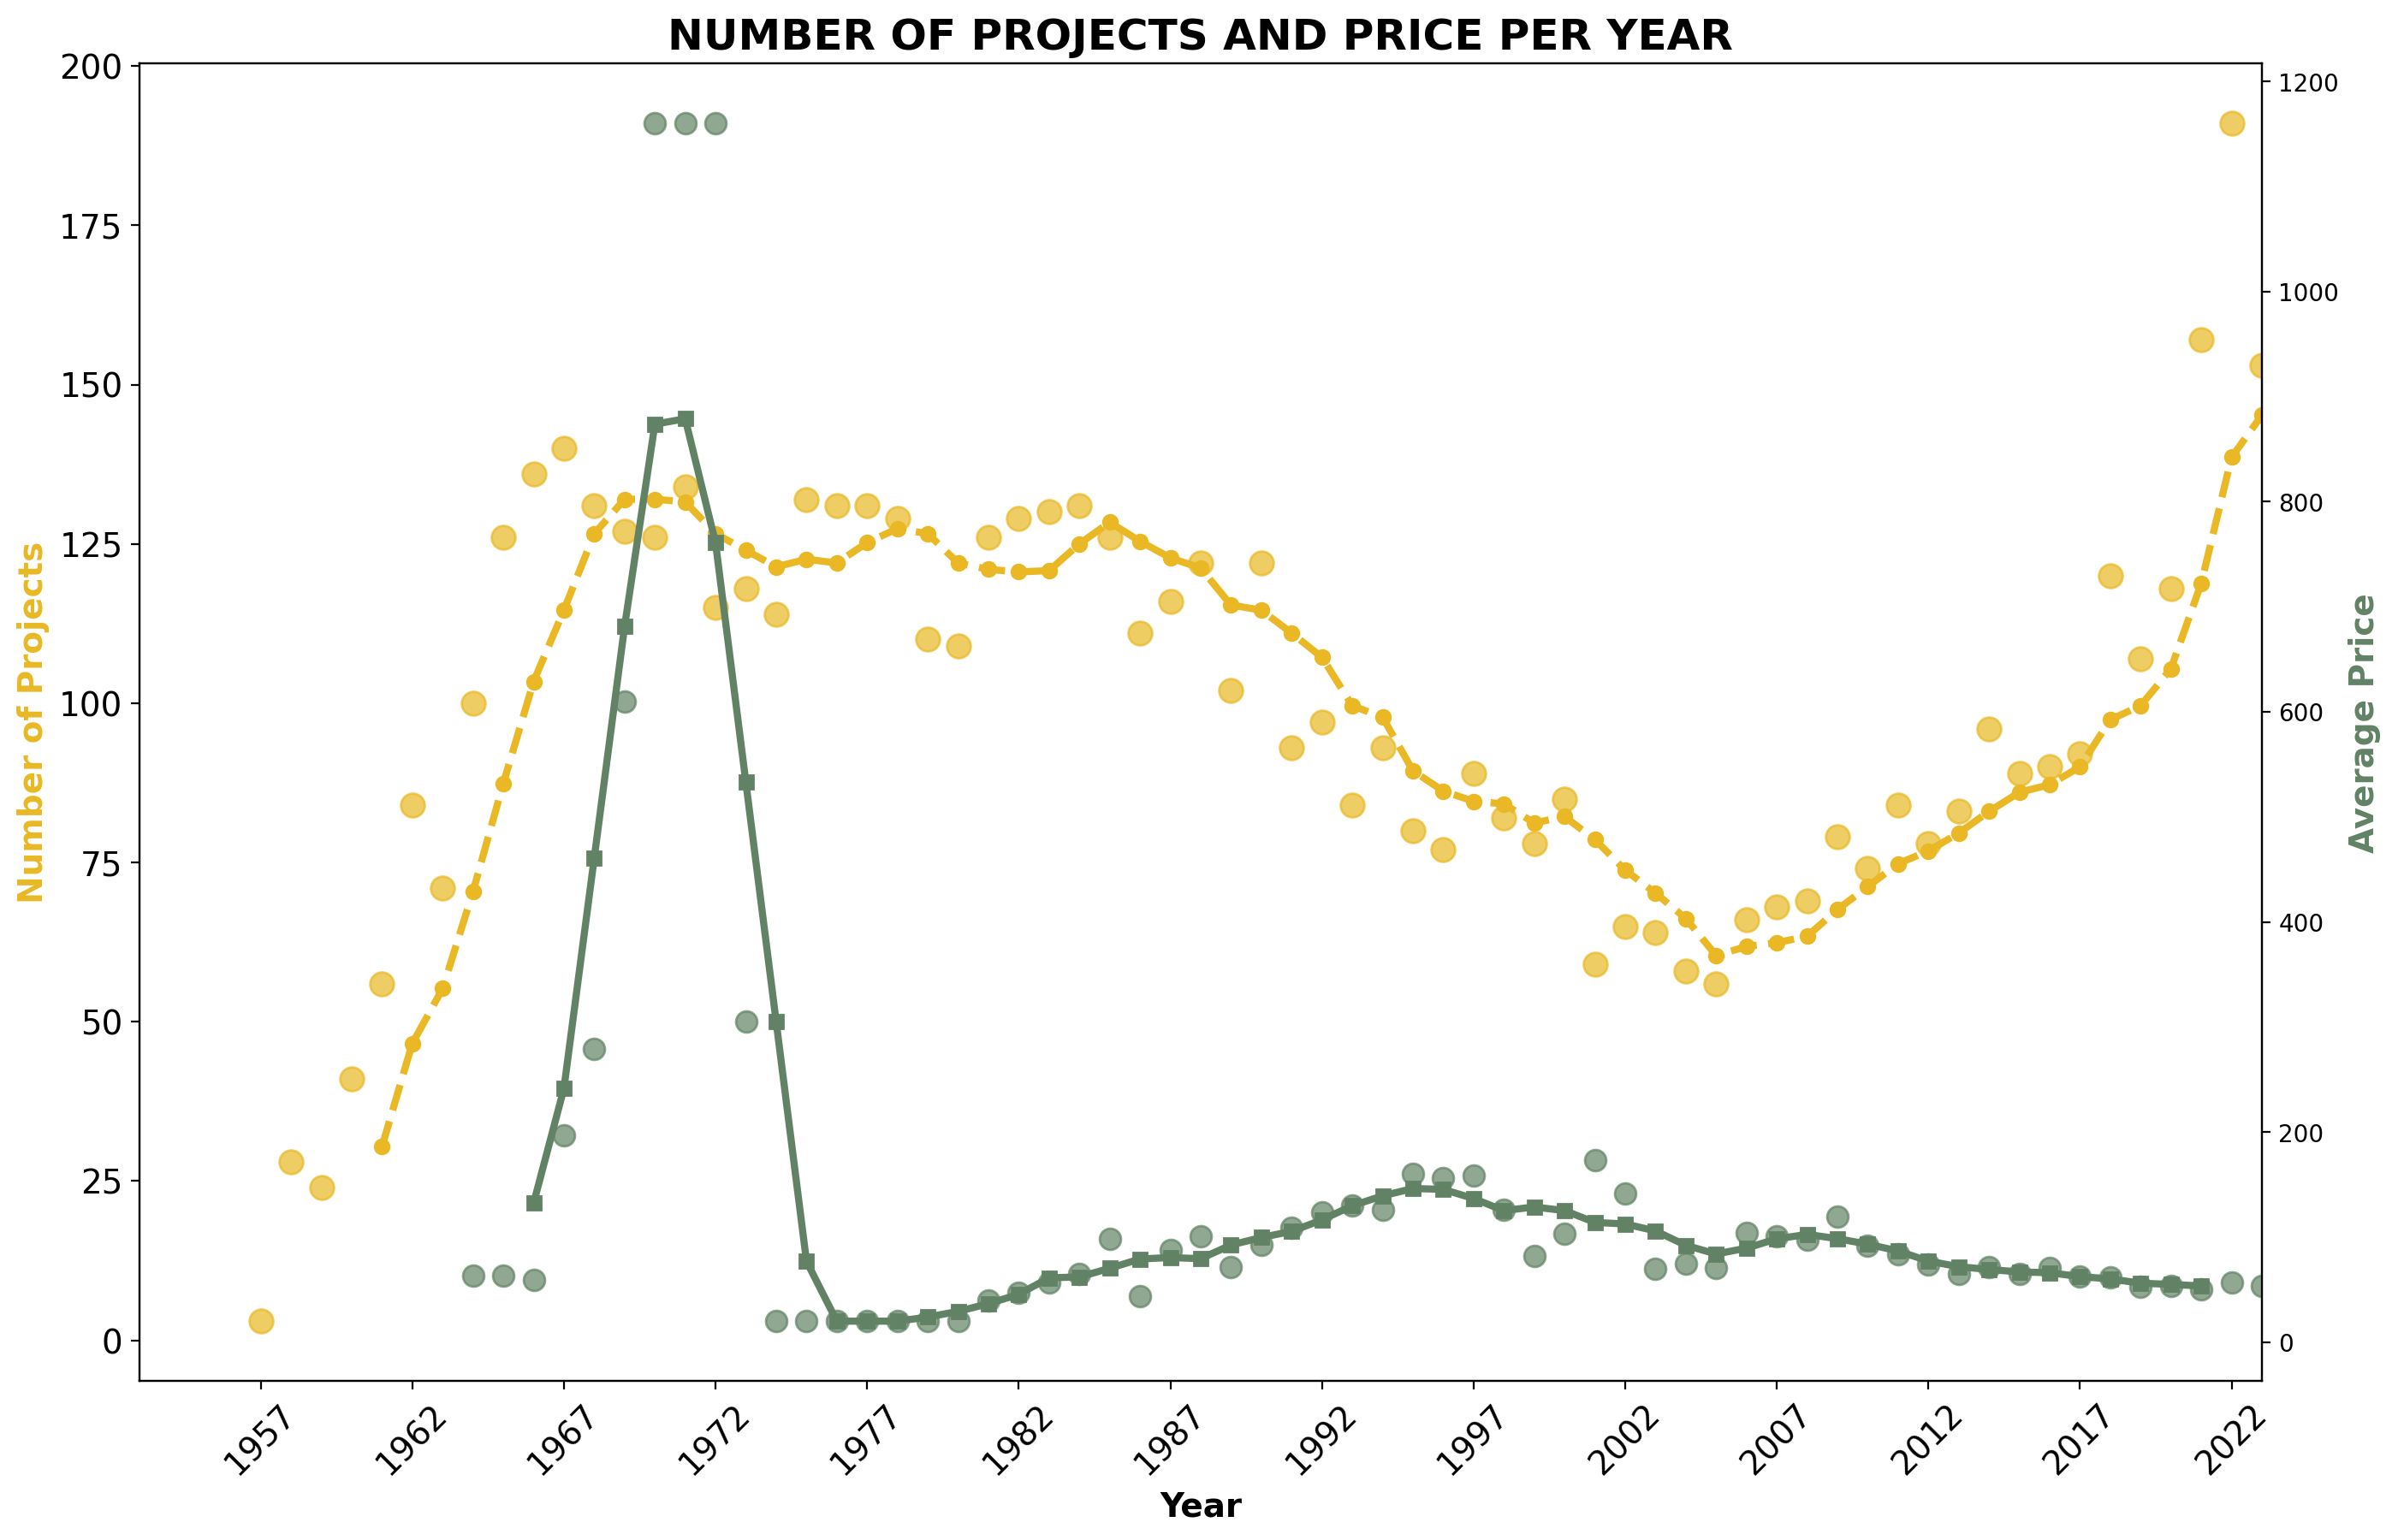

In [23]:
plt.figure(figsize=(16,10), dpi=200)

plt.title('NUMBER OF PROJECTS AND PRICE PER YEAR',
          weight='bold',
          fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(ticks = np.arange(1957,2024,step=5),
           fontsize=14,
           rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1953,2023)

ax1.set_xlabel('Year',
           weight='bold',
           fontsize=14)
ax1.set_ylabel('Number of Projects',
               weight='bold',
               fontsize=14,
               c='#E9B824')
ax2.set_ylabel('Average Price',
               weight = 'bold',
               fontsize=14,
               c='#618264')

ax1.scatter(x=yearly_launch.index,
            y=yearly_launch.values,
            c='#E9B824',
            alpha=0.7,
            s=100,)
ax1.plot(roll_yearly_launch.index, roll_yearly_launch.values,
         linewidth = 3,
         linestyle = '--',
         marker = 'o',
         c='#E9B824')

ax2.scatter(x=yearly_avgmoney['Year'],
            y=yearly_avgmoney['Price'],
            c='#618264',
            alpha=0.7,
            s=80,)
ax2.plot(roll_yearly_avgmoney['Year'],roll_yearly_avgmoney['Price'],
         linewidth = 3,
         marker='s',
         c='#618264')


We can see that space exploration was booming in 60s and the heat remained till 90s. After that period, the number of project declined every year and only came back up since 2010. Especially in 2022 with <b>191</b> rocket launches, recorded as the highest number in the history.

Same thing applied to the average price per project. The average price in 60s and 70s period was the highest and the rest was not too different from year to year.

#### *Projects per Month: Which months are most popular and least popular for lauches? (Line Chart)*

Using **Line Chart** to show difference in project number in every month.

In [24]:
#Create sub-dataframe to work with
monthly_launch = df_data.groupby('Month',as_index=False).size()

monthly_launch

,Month,size
0,1,395
1,2,487
2,3,517
3,4,571
4,5,535
5,6,599
6,7,551
7,8,583
8,9,578
9,10,588


In [25]:
#Create line chart for visualisation
month_name = ['Jan','Feb','Mar',
              'Apr','May','Jun',
              'Jul','Aug','Sep',
              'Oct','Nov','Dec']

monthly_line = px.line(monthly_launch,
                       x='Month',
                       y='size',
                       hover_name= month_name,
                       title='<b>Number of projects per month</b>',
                       markers=True)

monthly_line.update_layout(xaxis=dict(title='<b>Month</b>',
                                      range=[1,12],
                                      tick0=1,
                                      dtick=1),
                           yaxis=dict(title='<b>Number of projects'))

monthly_line.update_traces(line_color='green')

monthly_line.show()



According to the line chart, early months of the year have few number of launches comparing to other months. December is the month that has the highest number of rockets shoot to the sky.

### ***Rocket Status: number of*** **ACTIVES** ***versus*** **RETIRED** ***Rockets (Pie Chart)***

Using <b>Plotly Pie Chart</b> to show how many rockets are active compared to those that are decomissioned?

In [28]:
#Create Rocket Status Series
rstat_df = df_data['Rocket_status'].value_counts()
rstat_df

0    5237
1    1368
Name: Rocket_status, dtype: int64

In [29]:
#Color list to style pie chart
colors=['#BB2525', '#279EFF']

#Create pie chart
fig = px.pie(
             names=['Retired','Active'],
             values= rstat_df.values,
             title='<b>Rocket Status</b>',
             hole=.4
             )
fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title={'font': {'size': 25}}, legend={'font':{'size':30}})
fig.show()

We have known from data description that <b>20.7%</b> of rockets are still active. The reason mainly because some of organisations were collaped, especially RVSN USSR -  the organisation had most missions in the whole time range .

### ***Mission Status: number of*** **SUCCESSFUL** ***versus*** **PROBLEMATIC** ***- any kind of failures***



#### *Mission Status Overview (Pie Chart)*
Using <b>Plotly Pie Chart</b> to illustrate percentage of each mission status of all space exploration launches

In [30]:
#Create a series of Mission Status for visualisation
mstat_df = df_data['Mission_status'].value_counts()
mstat_df

Success              6033
Failure               452
Partial Failure       112
Prelaunch Failure       8
Name: Mission_status, dtype: int64

In [31]:
#Create pie chart
fig = px.pie(
             values=mstat_df.values,
             names=mstat_df.index,
             title='<b>Mission Status</b>',
             hole=.4)
fig.update_traces(textposition='outside',
                  textinfo='percent+label',
                  hoverinfo='all',
                  textfont_size=15,
                  marker=dict(colors=px.colors.sequential.Redor,
                              line=dict(color='#000000', width=2)))
fig.update_layout(title={'font': {'size': 25},
                         'automargin':True,
                         'x':0.8,
                         'y':0.9},
                  legend={'font':{'size':30},
                          'x':1,
                          'y':0.3})
fig.show()

Within the time range of dataset, we can see a very high successful rate with <b>91.3%</b>. That is a super rate which can make us much more beliving in potential of space exploration.
<br> However, it also raises a question which country or organisation has the highest failure rate? And which country has the highest successful rate?

#### *Mission Status for every Countries and Organisations (Sunburst Chart)*
Using <b>Sunburst Chart</b> to illustrate total number of each mission status for every Countries and Organisations in data

In [32]:
#Create sub-dataframe to work with
sunburst_df = df_data.groupby(by=['Country','Organisation', 'Mission_status'],
                              as_index=False).agg({'Detail':pd.Series.count})

#Rename column
sunburst_df.rename(columns={'Detail':'Nr_of_project'},inplace=True)

In [33]:
#Create Sunburst chart
burst = px.sunburst(sunburst_df,
                    path=['Country', 'Organisation', 'Mission_status'],
                    values='Nr_of_project',
                    title='<b>Mission status per project per organisation per country</b>')

burst.update_layout(xaxis_title='Number of Projects',
                    yaxis_title='Organisation',
                    coloraxis_showscale=False,
                    title={'font': {'size': 18}})

burst.show()


## **Visualize data by Country**

### ***Total number of projects per country***

Using **Choropleth Map** to visualise total number of projects per country

In [34]:
#Create sub-dataframe to create visualization
launch_by_country = df_data.groupby(['Country','Country_code'], as_index=False).agg({'Detail':pd.Series.count}).rename(columns={'Detail':'Number_of_projects'})


In [35]:
#Create Choropleth Map
world_map = px.choropleth(launch_by_country,
                          locations='Country_code',
                          color='Number_of_projects',
                          hover_name='Country',
                          color_continuous_scale=px.colors.sequential.Plasma)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

### ***Mission Status: Successful and Prolematic missions***
***Note***: *Problematic projects are any project have any kind of failure, either partial or pre-launch.*

#### *Number of problematic projects by country (Choropleth Map)*
Using <b>Choropleth Map</b> to show number of proplematic projects per country in dataset.


In [36]:
#Create sub-dataframe to work with
mission_st_df = df_data.pivot_table(index=['Country','Country_code'],
                                      columns='Mission_status',
                                      values='Detail',
                                      margins= True,
                                      aggfunc='count')

#Fill NaN values with 0
mission_st_df.fillna(0,inplace=True)

#drop 'All' row
mission_st_df.drop('All', inplace=True)

<ipython-input-36-40f3cc867ef9>:12: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [37]:
#Add 'Problem' column into sub-dataframe
cols = ['Failure', 'Partial Failure', 'Prelaunch Failure']
mission_st_df.insert(loc=3,
                     column='Problem',
                     value= mission_st_df[cols].sum(axis=1))

#Reset index
mission_st_df.reset_index(inplace=True)

In [38]:
#Create choropleth Map for number of problem by country
problem_world_map = px.choropleth(mission_st_df,
                          locations='Country_code',
                          color='Problem',
                          hover_name='Country',
                          color_continuous_scale=px.colors.sequential.Sunset)

problem_world_map.update_layout(coloraxis_showscale=True,)

problem_world_map.show()

There's no surprise that USA is the country has the most number of problematic projects.

#### *Successful and Problematic rate by country: Which country has the most successful rate? (Stacked Bar Chart)*
Using <b>Stacked Bar Chart</b> to illustrate both successful and problematic rate of each country in dataset


In [39]:
#Create sub-dataframe to work with
country_rate_df = df_data.pivot_table(index='Country_code',
                                      columns='Mission_status',
                                      values='Country',
                                      margins= True,
                                      aggfunc='count')
#fill NaN value
country_rate_df.fillna(0, inplace=True)

In [40]:
#Add Successful rate column
success_rate = country_rate_df['Success']/country_rate_df['All']*100
country_rate_df['Success_rate'] = success_rate.round(2)
#Add Problem rate column
#Problem projects are identified any failure happened in projects, even prelaunch or partial
problem_rate = (country_rate_df['All']-country_rate_df['Success'])/country_rate_df['All']*100
country_rate_df['Problem_rate'] = problem_rate.round(2)


In [41]:
#Drop All row out of sub-dataframe
country_rate_df.drop('All',inplace=True)
#Sort Success_rate column descending order
country_rate_df.sort_values('Success_rate', ascending=False,inplace=True)

In [44]:
#Create bar chart for visualization
new_name={'Success_rate': 'Successful Rate', 'Problem_rate': 'Problem Rate'}
b_split = px.bar(country_rate_df,
                 x=country_rate_df.index,
                 y=['Success_rate', 'Problem_rate'],
                 hover_data=['Success','All'],
                 text_auto=True,
                 title='<b>Successful & Problematic Rate per country</b>')
b_split.for_each_trace(lambda t: t.update(name=new_name[t.name]))
b_split.update_layout(xaxis_title='<b>Country</b>',
                      yaxis_title='<b>Rate</b>',
                      title={'font': {'size': 25}},
                      legend={'font':{'size':15},'title':'Rate'})
b_split.show()

According to chart above, all space projects launched in Kenya had **100%** successful rate, whereas missions launched in Brazil and United Kingdom had opposite rate with **0%** successful. However, this number doesn't tell anything due to small number of projects launched in these 2 countries.
<br>Russia with the highest number of projects, they still remained hight percentage of successful at **94.25%**. While USA as the main competitor, they only had **89.75%** successfull rate.

## **Visualize data by Organisation**

### ***Top 20 Organisations have most number of projects***

#### *Number of projects in top 20 (Bar Chart)*
Using <b>Bar Chart</b> to present number of projects of each organisation in top 20 list

In [47]:
#Top 20 organisation that have most number of space mission
project_per_org = df_data['Organisation'].value_counts()
top20_org = project_per_org[:20]
top20_org

RVSN USSR           2476
US Air Force         549
CASC                 500
Roscosmos            360
VKS RF               337
Arianespace          296
SpaceX               273
General Dynamics     251
NASA                 222
ULA                  157
Boeing               138
ILS                  137
Martin Marietta      114
ISRO                  91
Northrop              91
MHI                   88
Lockheed              79
Rocket Lab            40
Starsem               37
Sea Launch            36
Name: Organisation, dtype: int64

In [48]:
#Create bar chart for top 20 Organisations that have most number of space missions
country_bar = px.bar(x=top20_org.index,
                     y=top20_org.values,
                     color=top20_org.values,
                     title='<b>Top 20 Organisation with most number of projects</b>'
)

country_bar.update_layout(xaxis=dict(title='<b>Organisation</b>'),
                          yaxis=dict(title='<b>Number of Project</b>'),
                          coloraxis_showscale=False)

country_bar.update_xaxes(tickangle=-45)

country_bar.show()

From the chart above, we can clearly see that **RVSN USSR** has the most number of space missions (2476 projects), almost **5 times** more than the second ranking organisation (549 projects).


#### *Number of projects through year of top 20 organisations (Line Chart)*
Ultilizing <b>Line Chart</b> to show yearly space missions of each organisation in top 20.

In [49]:
#Pivot table to create sub-dataframe to work with
org_df = df_data.pivot_table(index='Year',
                             columns= 'Organisation',
                             values = 'Detail',
                             aggfunc='count')
#Fill NaN value with 0
org_df.fillna(0,inplace=True)

In [50]:
#Create moving average for 5 years window
roll_df = org_df.rolling(window=5).mean()

In [51]:
#Data Visualisation
org_line = go.Figure(layout=dict(xaxis=dict(title='<b>Year</b>',
                                            range=[1957,2023],
                                            tickmode='linear',
                                            tick0=1957,
                                            dtick=5,
                                            tickangle=-45),
                                 yaxis=dict(title='<b>Average Number Of Project</b>',
                                            range=[0,150],
                                            ),
                                 legend=dict(itemclick='toggleothers')))

for c in top20_org.index:
  org_line.add_trace(go.Scatter(x=roll_df.index,
                                y=roll_df[c],
                                mode='lines',
                                name=c,
                                line=dict(width=3),
                                ))
org_line.show()

According to line chart, we can clearly see that, even though RVSN USSR organisation has the most number of projects but most of them fall into 1970 to 1990. After that, number of their project drops down and totally disappear after 1990s when Soviet Union collapped.
<br>In the other hand, CASC and SpaceX are two organisations that have number of projects increase recently.

#### *Successful and Problematic rate of each organisation in top 20 organisations (Stacked Bar Chart)*
Using <b>Stacked Bar Chart</b> to show successful and problematic rate of each organisation in top 20.

In [61]:
#Create sub-dataframe to work with
org_rate_df = df_data.pivot_table(index='Organisation',
                                      columns='Mission_status',
                                      values='Detail',
                                      margins= True,
                                      aggfunc='count')
#fill NaN value
org_rate_df.fillna(0, inplace=True)
#drop All row
org_rate_df.drop('All', inplace=True)

In [62]:
#Add Successful rate column
org_success_rate = org_rate_df['Success']/org_rate_df['All']*100
org_rate_df['Success_rate'] = org_success_rate.round(2)
#Add Problem rate column
#Problem projects are identified any failure happened in projects, even prelaunch or partial
org_problem_rate = (org_rate_df['All']-org_rate_df['Success'])/org_rate_df['All']*100
org_rate_df['Problem_rate'] = org_problem_rate.round(2)

In [63]:
#Filter dataframe to contain only organisations in top 20
top20_org_rate = org_rate_df[org_rate_df.index.isin(top20_org.index)]
#Sort dataframe based on Successful rate
top20_org_rate.sort_values('Success_rate',ascending=False,inplace=True)

<ipython-input-63-404b623ee90d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
#Create bar chart for visualization
new_name={'Success_rate': 'Successful Rate', 'Problem_rate': 'Problem Rate'}
b_split = px.bar(top20_org_rate,
                 x=top20_org_rate.index,
                 y=['Success_rate', 'Problem_rate'],
                 hover_data=['Success','All'],
                 text_auto=True,
                 title='<b>Successful & Problem Rate per organisation in top 20.</b>')
b_split.for_each_trace(lambda t: t.update(name=new_name[t.name]))
b_split.update_layout(xaxis=dict(tickangle=-45),
                      xaxis_title='Organisation',
                      yaxis_title='Rate',
                      title={'font': {'size': 25}},
                      legend={'font':{'size':15},'title':'Rate'},
                      height=650,
                      width=800)
b_split.show()

While RVSN USSR has the most number of projects but their successful rate only stands at **14th (92.25%)** in top 20 organisation. It's still a significant rate.
<br>
One of most popular and well-known organisation in the world - NASA - has higher successful rate than RVSN USSR with **93.24%** and stand at **12th** in top 20 organisation list.
<br>
SpaceX and CASC - 2 organisations have the most number of space missions in recent years - somehow prove their advanced technology with high successful rate at **95.97%** and **95.2%** accordingly.

### ***Amount of money by Organisation***

#### *Top 20 organisations have spent the highest total amount of money on space exploration (Horizontal Bar Chart)*
Using <b>Bar Chart</b> to present 20 Organisations spent the highest total amount of money

In [65]:
#Create sub-dataframe to work with
money_org_df = price_df.groupby(by=['Organisation'],
                               as_index=False).agg({'Price':pd.Series.sum})

#Sort data frame based on Price from the largest to the smallest
money_org_df.sort_values('Price', ascending=False,inplace=True)

#Create sub-dataframe contain top 20 organisation
top20_money_org = money_org_df[:20]



In [66]:
#Create horizontal bar to illustrate the total money spent
money_org_bar = px.bar(top20_money_org,
                       x = 'Price',
                 y = 'Organisation',
                 orientation='h',
                 hover_name= 'Organisation',
                 color='Price',
                 color_continuous_scale=px.colors.sequential.haline,
                 title='<b>Top 20 Organisation with most money spent</b>')

money_org_bar.update_layout(xaxis_title='Total Money',
                      yaxis_title='Organisation',
                      coloraxis_showscale=False)
money_org_bar.show()


We can clearly see that NASA - only stand **9th** place in number of projects - is the organisation has the most money spent on spcace projects until now with <b>77.156 billion dollars</b> - almost 4 times more than RVSN USSR (2nd highest) with only <b>20.2 billion dollars</b>. That means every project from NASA were big project with a lot of funding involved.
<br>
<br>
Eurokot and Kosmotras are 2 organisations that not in top 20 list that have most number of projects but present in this list.

#### *Analyse the amount of money spent by Organisation per project (Horizontal bar Chart)*
Using <b>Bar Chart</b> to present average money spent per project per organisation

In [67]:
#Create sub-dataframe to work with
avgmoney_org_df = price_df.groupby(by=['Organisation'],
                               as_index=False).agg({'Price':pd.Series.mean})

#Sort data frame based on Price from the smallest to the largest
avgmoney_org_df.sort_values('Price', ascending=True,inplace=True)

In [68]:
#Create horizontal bar to illustrate the average money spent per project
avgmoney_org_bar = px.bar(x = avgmoney_org_df['Price'],
                 y = avgmoney_org_df['Organisation'],
                 orientation='h',
                 color=avgmoney_org_df['Price'],
                 color_continuous_scale=px.colors.sequential.Burg,
                 title='<b>Average Money Per Project by Organisation</b>')

avgmoney_org_bar.update_layout(xaxis_title='<b>Average Money</b>',
                      yaxis_title='<b>Organisation</b>',
                      coloraxis_showscale=False,
                      font=dict(size=10),
                      autosize=False,
                      width=600,
                      height=1000)
avgmoney_org_bar.show()


From what we see above, there's no surprise that NASA has the highest average money spent per project.
<br>On the other hand, RVSN USSR only placed <b>16th</b> with only <b>30  million dollars</b> per project. However, all RVSN USSR projects were in 70s to 90s and if we take inflation into consideration, the actual money they spent for each launch should be worth more than 30 million.

## **Cold War Space Race: USA vs Soviet**

***Note***: *The cold war lasted from the start of the dataset up until 1991.*

### ***Filter dataframe to show information between USA and Soviet during cold war only***

In [69]:
#Apply filtering to get necessary dataframe
cold_war_df = df_data[(df_data['Year']<=1991) &
                    ((df_data['Country'] == 'USA')|
                     (df_data['Country'] == 'Russian Federation')|
                     (df_data['Country'] == 'Kazakhstan'))]

In [70]:
#Add Side column to dataframe. There're only 2 sides in cold war: Soviet and USA
cold_war_df['Side']= cold_war_df['Country'].map({'Kazakhstan':'Soviet',
                                                 'Russian Federation':'Soviet',
                                                 'USA':'USA'})

<ipython-input-70-90ee0443de99>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### ***Visualise total number of projects of the Soviet and the USA (Pie Chart)***

Using <b>Pie Chart</b> to illustate number of projects of 2 sides during cold war

In [71]:
num_launch = cold_war_df['Side'].value_counts()
num_launch

Soviet    2478
USA       1075
Name: Side, dtype: int64

In [72]:
#Color list to style pie chart
colors=['#F8F0E5', '#EF9595']

#Create pie chart
fig = px.pie(names=num_launch.index,
             values=num_launch.values,
             title='<b>Number of Launches of the Soviet and USA</b>')

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(title={'font': {'size': 25}}, legend={'font':{'size':30}})
fig.show()

The total number of projects from Soviet during cold war period was more than 2 times USA's total number of projects.

### ***Total Number of Projects Year-One-Year by the Two Superpowers (Line Chart)***

Create <b>Line Chart</b> to show the yearly number of 2 sides

In [120]:
#Create sub-dataframe
yearly_us_soviet = cold_war_df.groupby(['Year','Side'], as_index=False).size()
#Rename column
yearly_us_soviet.rename(columns={'size':'Number_of_projects'}, inplace=True)

In [122]:
#Line chart visualisation
fig = px.line(yearly_us_soviet,
              x='Year',
              y='Number_of_projects',
              color='Side',
              color_discrete_sequence=['#94A684','#FF6969'] ,
              title='<b>NUMBER OF LAUNCH PER YEAR OF SOVIET VS USA</b>',
              hover_name='Year',
              symbol='Side',
              width=700)

fig.update_layout(xaxis=dict(title='<b>Year</b>',
                             range=[1957,1991],
                             tickmode='linear',
                             tickfont=dict(size=9),
                             tick0=1957,
                             dtick=1,
                             tickangle=-45,
                             linecolor='black',
                             gridcolor='lightgrey',
                             griddash='dash'),
                  yaxis=dict(title='<b>Number of projects</b>',
                             linecolor='black',
                             gridcolor='lightgrey',
                             griddash='dash',
                             mirror=True),
                  plot_bgcolor='white')

fig.show()

Before 1966, USA had more number of projects than Soviet every year but everything changed after that.
<br>
During period between 1974 and 1988, Soviet had number of space missions more than 2 times USA's number every year.

### ***Total Number of Problematic projects yearly (Group Bar Chart)***

Create <b>Group Bar Chart</b> to illustrate the problematic projects of 2 sides yearly

In [134]:
#Create Mission Status dataframe for Soviet and USA
mission_us_soviet = cold_war_df.groupby(['Year','Side','Mission_status'], as_index=False).size()
#Rename column
mission_us_soviet.rename(columns={'size':'Number'},inplace=True)

In [135]:
#Filter dataframe to problematic projects only
issue_us_soviet = mission_us_soviet[mission_us_soviet['Mission_status'] != 'Success']

In [136]:
#Create group bar chart for visualisation
g_bar = px.bar(fail,
               x='Year',
               y='Number',
               title='<b>SOVIET vs USA PROBLEMATIC </b>',
               color='Side',
               color_discrete_sequence=['#FF6969','#94A684'],
               barmode='group',
               hover_name='Year',
               hover_data=['Mission_status'],
               )

g_bar.update_layout(xaxis=dict(title='<b>Year</b>',
                               tickfont=dict(size=9),
                               tick0=1957,
                               dtick=1,
                               linecolor='grey',
                               gridcolor='lightgrey',
                               griddash='dot'),
                    yaxis=dict(title='<b>Number of projects</b>',
                               linecolor='grey',
                               gridcolor='lightgrey',
                               griddash='dot',
                               mirror=True),
                    plot_bgcolor='white')

g_bar.show()

Even though USA had more projects than Soviet before 1966, they also had more problematic projects as well. Especially, in 1958 and 1961, the number of problematic projects were the highest during the cold war period.
<br>
After 1966, despite of more than 2 times greater in number of space missions, Soviet's number of problematic projects was not significantly higher than USA's number.

### ***Problematic percentage over time(Line chart)***

Illustrating problematic percentage of 2 sides over time by using **Line Chart**

In [137]:
mission_us_soviet.head()

,Year,Side,Mission_status,Number
0,1957,Soviet,Success,2
1,1957,USA,Failure,1
2,1958,Soviet,Failure,4
3,1958,Soviet,Success,1
4,1958,USA,Failure,16


In [142]:
#Create Soviet's mission status dataframe
soviet_pr = mission_us_soviet[mission_us_soviet['Side']=='Soviet'].pivot_table(index='Year',
                                                                               columns='Mission_status',
                                                                               values='Number',
                                                                               aggfunc='sum',
                                                                               margins=True)

#Calculate the problem rate
problem_rate = (soviet_pr['All']-soviet_pr['Success'])/soviet_pr['All']*100

#Add Problematic rate column
soviet_pr.insert(4,'Problematic_rate',problem_rate,True)


In [143]:
#Create Soviet's mission status dataframe
usa_pr = mission_us_soviet[mission_us_soviet['Side']=='USA'].pivot_table(index='Year',
                                                                               columns='Mission_status',
                                                                               values='Number',
                                                                               aggfunc='sum',
                                                                               margins=True)

#Calculate the problem rate
problem_rate = (usa_pr['All']-usa_pr['Success'])/usa_pr['All']*100

#Add Problematic rate column
usa_pr.insert(4,'Problematic_rate',problem_rate,True)

In [162]:
#Data visualisation
fig = go.Figure(
    layout=dict(title='<b>SOVIET vs USA PROBLEMATIC RATE',
        xaxis=dict(title='<b>Year</b>',
                   range=[1957,1991],
                   tickmode='linear',
                   tick0=1957,
                   dtick=1,
                   linecolor='black',
                   gridcolor='lightgrey',
                   griddash='dash'),
        yaxis=dict(range=[0,100],
                   title='<b>Problematic rate</b>',
                   linecolor='black',
                   gridcolor='lightgrey',
                   griddash='dash',
                   mirror=True),
        legend=dict(itemclick='toggleothers'),
        plot_bgcolor='white'
    )
)


fig.add_trace(go.Scatter(
                         x=usa_pr.index,
                         y=usa_pr['Problematic_rate'],
                         mode='lines+markers',
                         name='USA problematic rate',
                         line=dict(color='#FF6969'),
                         ))

fig.add_trace(go.Scatter(
                         x=soviet_pr.index,
                         y=soviet_pr['Problematic_rate'],
                         mode='lines+markers',
                         name='Soviet Failure Rate',
                         line=dict(color='#94A684')
                         ))


fig.show()


Even though USA had less problematic projects than Soviet after 1966, but the problematic rate was not always lower than Soviet. Especially in 1980 and 1986, USA's problematic rate were way more higher than Soviet.

### ***Conclusion***

In cold war time, Soviet and USA had the really intense space race. They believed beside Earth, there are lives somewhere on another planet and if they can find them, they would gain advantages than other.
<br>
Although USA was the first one to start space missions but Soviet was the one had more number of projects and better technology to minimize issues happened in their exploration and lauching.